**DATA**

- TBD

In [84]:
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

data = pd.read_csv("data.csv")
print("raw data overview")
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(data.head())
    data.info()





raw data overview


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [85]:
from sklearn.preprocessing import LabelEncoder

data['Attrition'] = data['Attrition'].map({'Yes':1, 'No': 0})
data = data.drop(columns=['EmployeeNumber'])

#fix all text coloumns
non_number_colums = data.dtypes[data.dtypes == 'object'].index
#data = data.drop(columns=non_number_colums)

# Convert text columns to numeric using LabelEncoder
encoder = LabelEncoder()
for col in non_number_colums:
    data[col] = encoder.fit_transform(data[col])

with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(data.head())
    data.info()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int32
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

**Correlation plots**

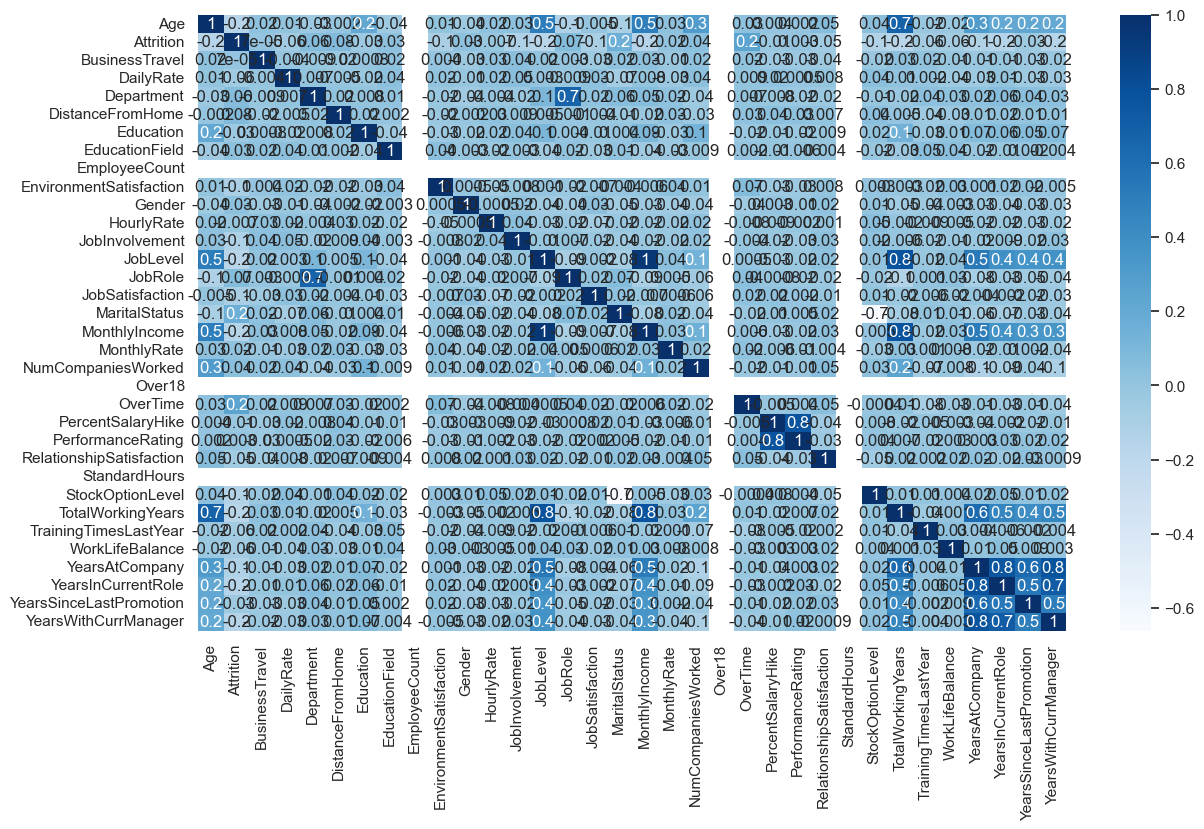

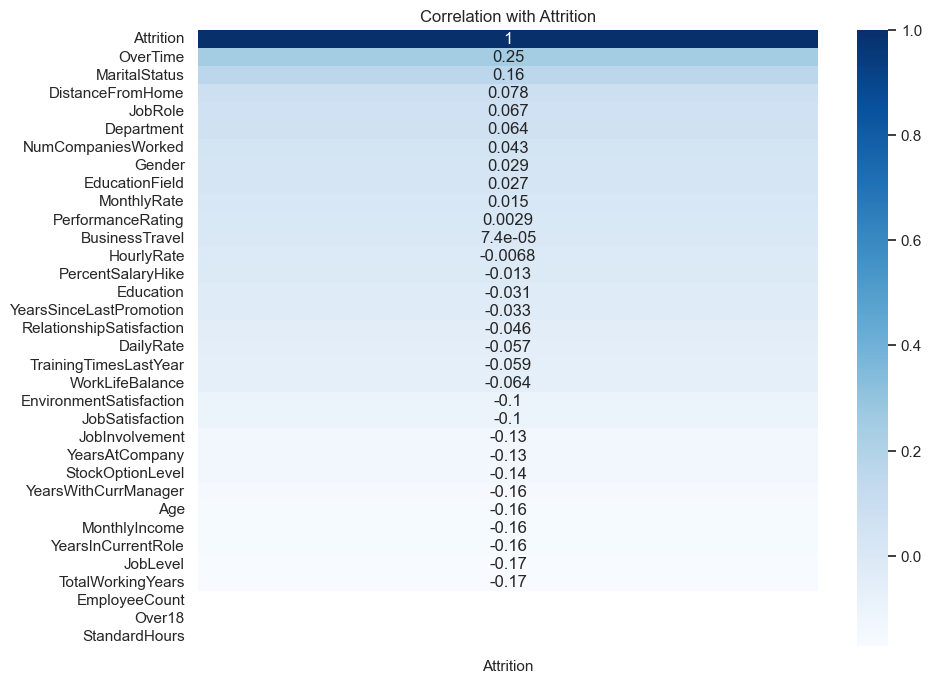

In [86]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.set_theme(style="white")

corr = data.corr(method='pearson')

heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

corr = data.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['Attrition']].sort_values('Attrition', ascending=False), annot=True, cmap='Blues')
plt.title("Correlation with Attrition")
plt.show()



**Tensorflow interpretation**

In [87]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


print("TensorFlow version:", tf.__version__)


#x and y
(y_train, x_train) = (data['Attrition'], data.drop(columns=['Attrition']))
scaler = StandardScaler().fit(x_train)

# splitting data
length = len(data)
(x_test, y_test) = (x_train[length-200:length].to_numpy(), y_train[length-200:length].to_numpy())
(x_train, y_train) = (x_train[:length-200].to_numpy(), y_train[:length-200].to_numpy())




#normalise data
(x_train, y_train) = (scaler.transform(x_train),y_train)
(x_test, y_test) = (scaler.transform(x_test),y_test)



#double up 
x_train = np.concatenate([x_train, x_train[y_train == 1]], axis=0)
y_train = np.concatenate([y_train, y_train[y_train == 1]], axis=0)

#model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(len(data.columns) - 1, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2)
])





loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)
print("loss, accuracy =>", model.evaluate(x_test,  y_test, verbose=0))


TensorFlow version: 2.13.0
Epoch 1/10


c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


47/47 [==============================] - 0s 664us/step - loss: 0.5914 - accuracy: 0.7070
Epoch 2/10
47/47 [==============================] - 0s 609us/step - loss: 0.5000 - accuracy: 0.7754
Epoch 3/10
47/47 [==============================] - 0s 522us/step - loss: 0.4515 - accuracy: 0.8092
Epoch 4/10
47/47 [==============================] - 0s 522us/step - loss: 0.4217 - accuracy: 0.8092
Epoch 5/10
47/47 [==============================] - 0s 522us/step - loss: 0.4058 - accuracy: 0.8160
Epoch 6/10
47/47 [==============================] - 0s 500us/step - loss: 0.3836 - accuracy: 0.8254
Epoch 7/10
47/47 [==============================] - 0s 522us/step - loss: 0.3640 - accuracy: 0.8451
Epoch 8/10
47/47 [==============================] - 0s 478us/step - loss: 0.3582 - accuracy: 0.8363
Epoch 9/10
47/47 [==============================] - 0s 565us/step - loss: 0.3486 - accuracy: 0.8505
Epoch 10/10
47/47 [==============================] - 0s 543us/step - loss: 0.3278 - accuracy: 0.8539
loss, accu

In [88]:

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

actual_test = np.vstack((x_train, x_test))
actual_out = np.concatenate([y_train, y_test], axis=0)

actual_test = x_test
actual_out =  y_test


predict = model.predict(actual_test)
normalised =  predict / predict.sum(axis= 1)[:, np.newaxis]

print(np.argmax(normalised, axis=1))
print("\n\n\n" ,actual_out)

print("actual, predicted", sum(actual_out), sum(np.argmax(probability_model(actual_test), axis=1)))

unique, counts = np.unique(actual_out +  np.argmax(probability_model(actual_test), axis=1),return_counts=True)
dict(zip(unique, counts))




7/7 [==============================] - 0s 500us/step
[0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0]



 [0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
actual, predicted 29 31


{0: 155, 1: 30, 2: 15}

**Random forest data preduciontrs thigns**

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset (X: features, y: target variable)
data = pd.read_csv("data.csv")
data = data.drop(columns=['EmployeeNumber'])
data['Attrition'] = data['Attrition'].map({'Yes':1, 'No': 0})

encoder = LabelEncoder()
for col in non_number_colums:
    data[col] = encoder.fit_transform(data[col])

(y, X) = (data['Attrition'], data.drop(columns=['Attrition']))
# y = y.to_numpy().reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)



unique, counts = np.unique(y_test + y_pred,return_counts=True)
print(dict(zip(unique, counts)))

print("Accuracy:", accuracy)

{0: 253, 1: 37, 2: 4}
Accuracy: 0.8741496598639455


      Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
2      37          1               2       1373           1                 2   
14     28          1               2        103           1                24   
21     36          1               2       1218           2                 9   
24     34          1               2        699           1                 6   
...   ...        ...             ...        ...         ...               ...   
1438   23          1               1        638           2                 9   
1442   29          1               2       1092           1                 1   
1444   56          1               2        310           1                 7   
1452   50          1               1        878           2                 1   
1461   50          1               2        410           2                28   

      Education  EducationF

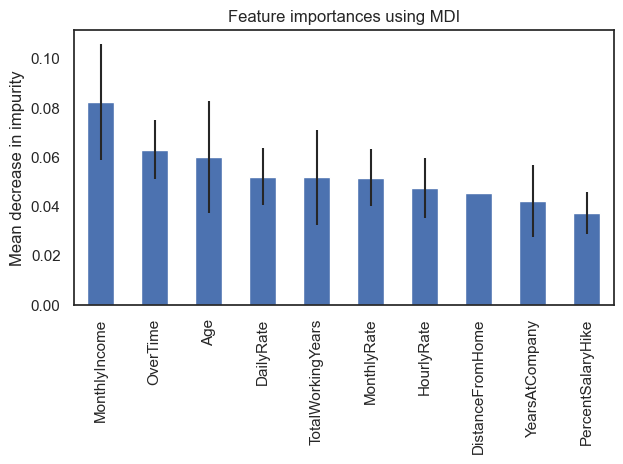

In [104]:
importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_], axis=0)
feature_names = [f"feature {i}" for i in range(X.shape[1])]

temp = data.drop(columns=['Attrition'])

values = [importances, list(temp.columns)]


forest_importances = pd.Series(list(values[0]), list(values[1]))
forest_importances_sorted = forest_importances.sort_values(ascending=False)
forest_importances_sorted = forest_importances_sorted.head(10)


fig, ax = plt.subplots()
forest_importances_sorted.plot.bar(yerr=std[0:10], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()



In [103]:
pd_output = pd.DataFrame(probability_model(actual_test))
pd_output = pd_output.sort_values(by=pd_output.columns[0], axis=0)
# print(pd_output.head(109))

# print(data.loc[69])
print(data[data['Attrition'] == 1])
# nonData = data.drop()

mean = data.mean(axis=0)
std = data.std(axis=0)

print(data.loc[56])
differecne = data.loc[56] - mean

order_away = differecne/std
# print(order_away)

# comparison = pd.DataFrame([mean, std, differecne, order_away])
print(order_away.sort_values())
# print(comparison.head())
# print(differecne)

      Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
2      37          1               2       1373           1                 2   
14     28          1               2        103           1                24   
21     36          1               2       1218           2                 9   
24     34          1               2        699           1                 6   
...   ...        ...             ...        ...         ...               ...   
1438   23          1               1        638           2                 9   
1442   29          1               2       1092           1                 1   
1444   56          1               2        310           1                 7   
1452   50          1               1        878           2                 1   
1461   50          1               2        410           2                28   

      Education  EducationF

KeyError: 56

<Axes: >

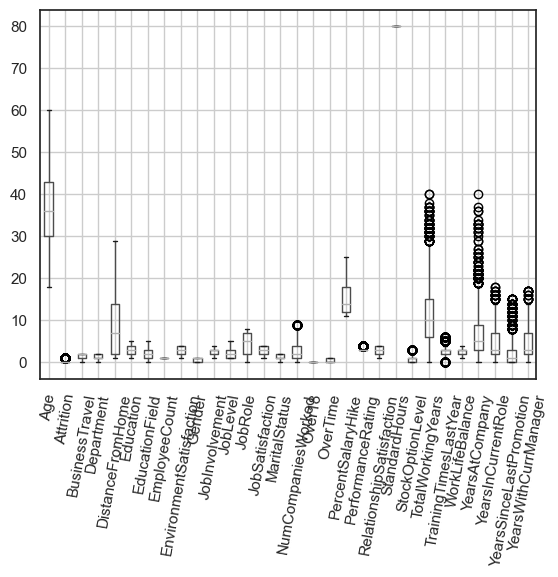

In [92]:
to_show = data.drop(columns=['MonthlyRate', 'MonthlyIncome', 'DailyRate', 'HourlyRate'])

to_show.boxplot(rot=80)